## Etape 4.2 : Visualisations Seaborn

In [38]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configuration affichage
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Chemins
DATA_DIR = "../data"
OUTPUT_DIR = "../data/output"
PARQUET_DIR = "../data/output/consommations_clean"

In [39]:
# récupération des données précédentes
df_final = pd.read_csv("../data/output/consommations_enrichies.csv" , sep=",")

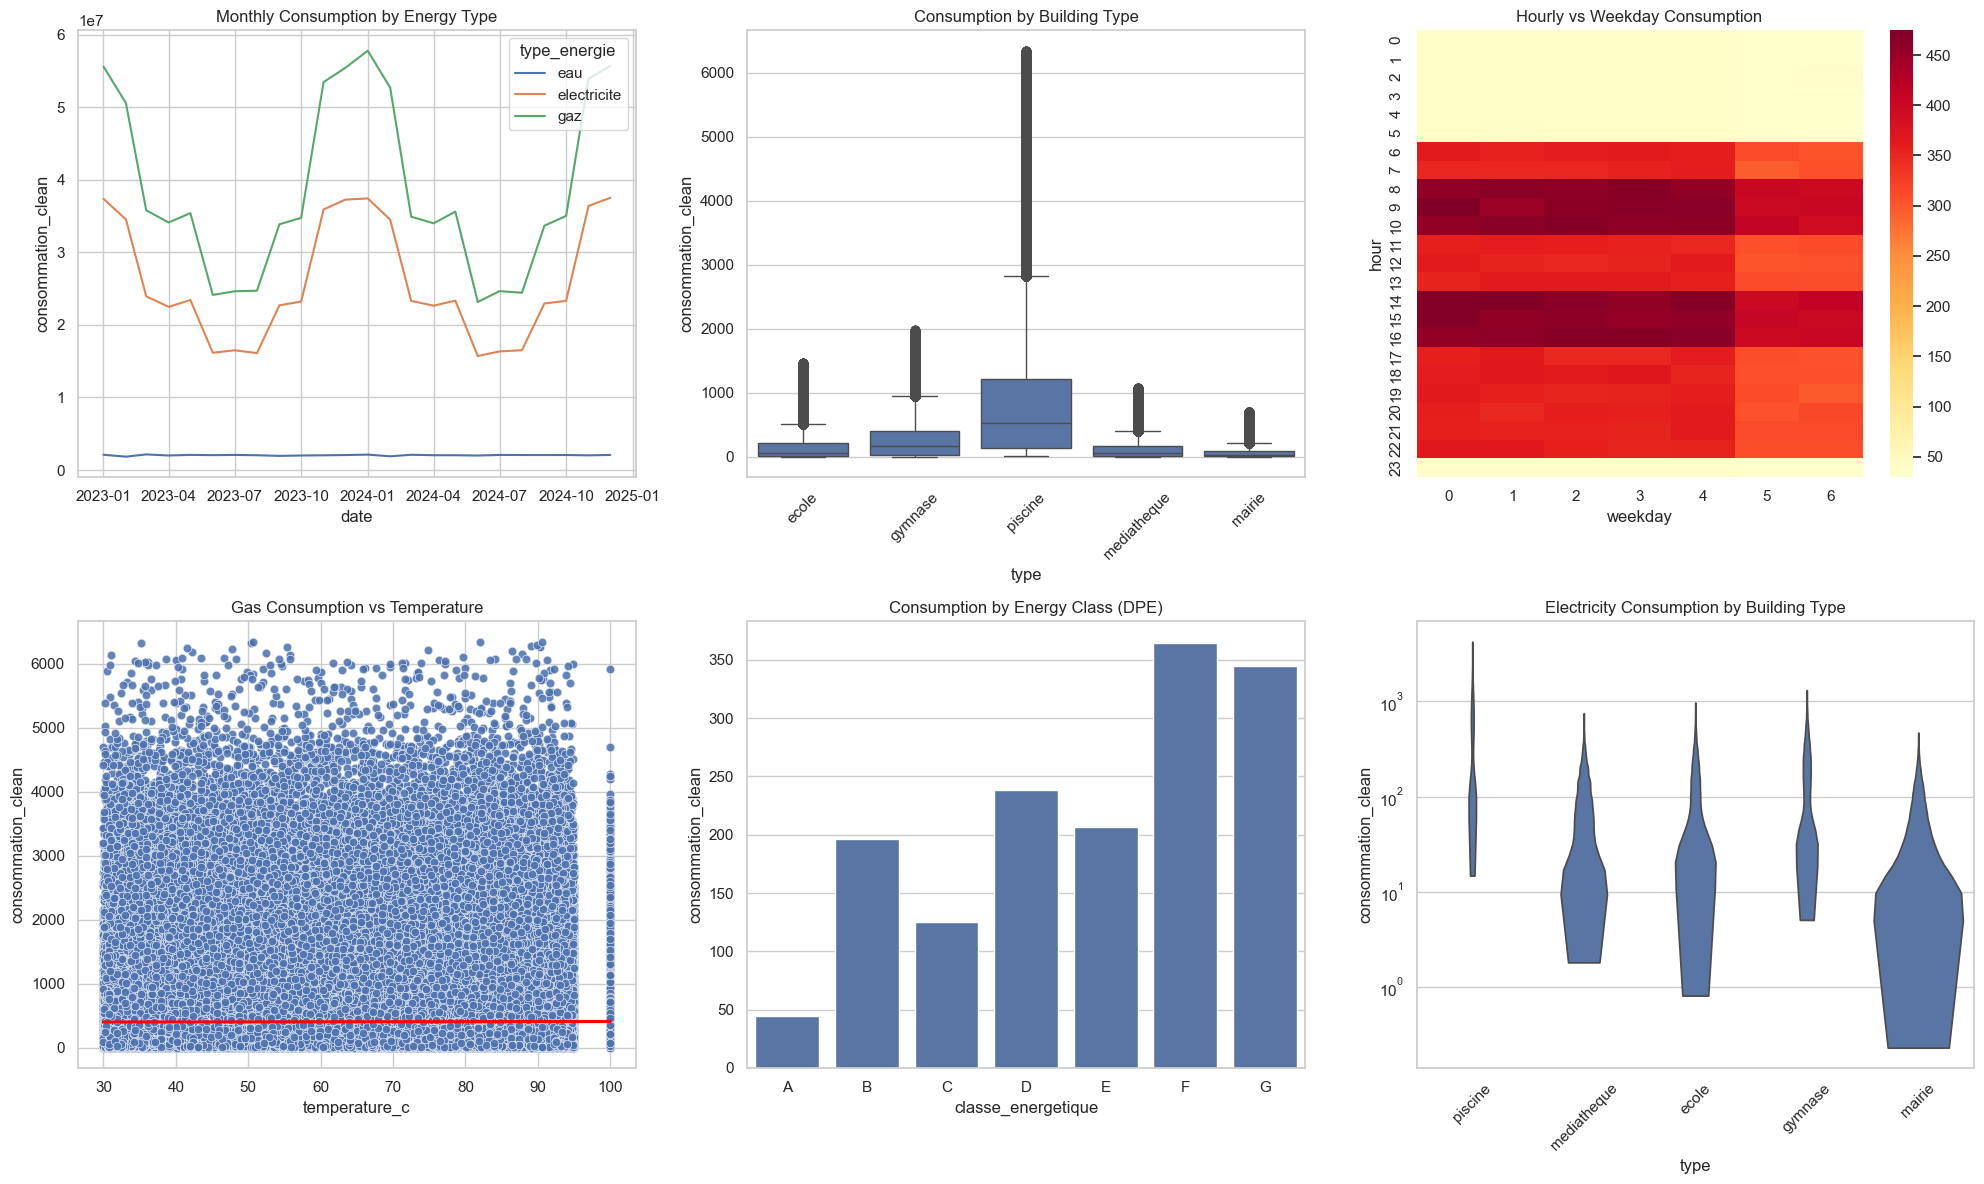

In [40]:

sns.set_theme(style="whitegrid")

# OBLIGATOIRE
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Pairplot des consommations (electricite, gaz, eau) par saison
df_monthly = (
    df_final
    .groupby(["year", "month", "type_energie"])["consommation_clean"]
    .sum()
    .reset_index()
)
df_monthly["date"] = pd.to_datetime(
    df_monthly[["year", "month"]].assign(DAY=1)
)

sns.lineplot(
    data=df_monthly,
    x="date",
    y="consommation_clean",
    hue="type_energie",
    ax=axes[0, 0]
)
axes[0, 0].set_title("Monthly Consumption by Energy Type")

# Violin plot de la consommation electrique par type de batiment
sns.boxplot(
    data=df_final,
    x="type",
    y="consommation_clean",
    ax=axes[0, 1]
)
axes[0, 1].set_title("Consumption by Building Type")
axes[0, 1].tick_params(axis="x", rotation=45)

# Heatmap annotee de la matrice de correlation complete
heatmap_data = (
    df_final
    .groupby(["hour", "weekday"])["consommation_clean"]
    .mean()
    .unstack()
)

sns.heatmap(
    heatmap_data,
    cmap="YlOrRd",
    ax=axes[0, 2]
)
axes[0, 2].set_title("Hourly vs Weekday Consumption")

# FacetGrid : evolution mensuelle par commune (top 6 communes)
df_gaz = df_final[df_final["type_energie"] == "gaz"]

sns.scatterplot(
    data=df_gaz,
    x="temperature_c",
    y="consommation_clean",
    alpha=0.4,
    ax=axes[1, 0]
)
sns.regplot(
    data=df_gaz,
    x="temperature_c",
    y="consommation_clean",
    scatter=False,
    color="red",
    ax=axes[1, 0]
)
axes[1, 0].set_title("Gas Consumption vs Temperature")

# Jointplot : relation surface vs consommation avec distributions marginales
dpe_data = (
    df_final
    .groupby("classe_energetique")["consommation_clean"]
    .mean()
    .reset_index()
)

sns.barplot(
    data=dpe_data,
    x="classe_energetique",
    y="consommation_clean",
    ax=axes[1, 1]
)
axes[1, 1].set_title("Consumption by Energy Class (DPE)")

# Catplot : consommation par classe energetique et type de batiment
df_elec = df_final[df_final["type_energie"] == "electricite"]

sns.violinplot(
    data=df_elec,
    x="type",
    y="consommation_clean",
    ax=axes[1, 2],
    inner=None,
    cut=0
)

axes[1, 2].set_yscale("log")
axes[1, 2].set_title("Electricity Consumption by Building Type")
axes[1, 2].tick_params(axis="x", rotation=45)


# --------------------------------------------------
plt.savefig("../data/output/graphics/10_dashboard_seabonr_visualisation.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
